In [2]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

# set this to where you want to save figures:
#figdir = '/g/data/v45/akm157/figures/Weddell_connectivity/IAF/'

In [25]:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
iaf_cycle1 = '01deg_jra55v140_iaf'
iaf_cycle2 = '01deg_jra55v140_iaf_cycle2'
iaf_cycle3 = '01deg_jra55v140_iaf_cycle3'

first_year = '1958'
last_year = '2018'

start_time=first_year+'-01-01'
end_time=last_year+'-12-31'

time_period = str(int(start_time[:4]))+'-'+str(int(end_time[:4]))


In [26]:
# load temperature data at 400m:

depth_slice = slice(400, 6000)
# cut the data BOX 1
lon_slice  = slice(-252.7, -251.7)
lat_slice  = slice(-65.35, -65.1)

temp_400m = cc.querying.getvar(iaf_cycle1,'temp' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time) - 273.15
temp_400m = temp_400m.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice).sel(st_ocean=depth_slice)
temp_400m = temp_400m.mean('st_ocean')
temp_400m = temp_400m.load()

sal_400m = cc.querying.getvar(iaf_cycle1,'salt' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
sal_400m = sal_400m.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice).sel(st_ocean=depth_slice)
sal_400m = sal_400m.mean('st_ocean')
sal_400m = sal_400m.load()

temp_400m2 = cc.querying.getvar(iaf_cycle2,'temp' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time) - 273.15
temp_400m2 = temp_400m2.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice).sel(st_ocean=depth_slice)
temp_400m2 = temp_400m2.mean('st_ocean')
temp_400m2 = temp_400m2.load()

sal_400m2 = cc.querying.getvar(iaf_cycle2,'salt' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
sal_400m2 = sal_400m2.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice).sel(st_ocean=depth_slice)
sal_400m2 = sal_400m2.mean('st_ocean')
sal_400m2 = sal_400m2.load()

temp_400m3 = cc.querying.getvar(iaf_cycle3,'temp' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time) - 273.15
temp_400m3 = temp_400m3.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice).sel(st_ocean=depth_slice)
temp_400m3 = temp_400m3.mean('st_ocean')
temp_400m3 = temp_400m3.load()

sal_400m3 = cc.querying.getvar(iaf_cycle3,'salt' , master_session,frequency='1 monthly',start_time=start_time, end_time=end_time)
sal_400m3 = sal_400m3.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice).sel(st_ocean=depth_slice)
sal_400m3 = sal_400m3.mean('st_ocean')
sal_400m3 = sal_400m3.load()


In [27]:
# area weighting:
area_t = cc.querying.getvar('01deg_jra55v13_ryf9091','area_t',master_session, ncfile = 'ocean_grid.nc',n=-1)
area_t = area_t.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)

# sum area:
area_t_sum = area_t.sum('xt_ocean').sum('yt_ocean')

# Apply area weight:
temp_400m = (temp_400m*area_t).sum('xt_ocean').sum('yt_ocean')/area_t_sum
sal_400m = (sal_400m*area_t).sum('xt_ocean').sum('yt_ocean')/area_t_sum

temp_400m2 = (temp_400m2*area_t).sum('xt_ocean').sum('yt_ocean')/area_t_sum
sal_400m2 = (sal_400m2*area_t).sum('xt_ocean').sum('yt_ocean')/area_t_sum

temp_400m3 = (temp_400m3*area_t).sum('xt_ocean').sum('yt_ocean')/area_t_sum
sal_400m3 = (sal_400m3*area_t).sum('xt_ocean').sum('yt_ocean')/area_t_sum

In [28]:
# annual averaging:
temp_400m_annual = temp_400m.groupby('time.year').mean(dim='time')
sal_400m_annual = sal_400m.groupby('time.year').mean(dim='time')

temp_400m_annual2 = temp_400m2.groupby('time.year').mean(dim='time')
sal_400m_annual2 = sal_400m2.groupby('time.year').mean(dim='time')

temp_400m_annual3 = temp_400m3.groupby('time.year').mean(dim='time')
sal_400m_annual3 = sal_400m3.groupby('time.year').mean(dim='time')

#month
temp_400m_mth = temp_400m.groupby('time.month').mean(dim='time')
sal_400m_mth = sal_400m.groupby('time.month').mean(dim='time')

temp_400m_mth2 = temp_400m2.groupby('time.month').mean(dim='time')
sal_400m_mth2 = sal_400m2.groupby('time.month').mean(dim='time')

temp_400m_mth3 = temp_400m3.groupby('time.month').mean(dim='time')
sal_400m_mth3 = sal_400m3.groupby('time.month').mean(dim='time')

In [ ]:
temp_400m = temp_400m.load()
temp_400m_annual = temp_400m_annual.load()
temp_400m_mth = temp_400m_mth.load()

sal_400m = sal_400m.load()
sal_400m_annual = sal_400m_annual.load()
sal_400m_mth = sal_400m_mth.load()

In [ ]:
temp_400m2 = temp_400m2.load()
temp_400m_annual2 = temp_400m_annual2.load()
temp_400m_mth2 = temp_400m_mth2.load()

sal_400m2 = sal_400m2.load()
sal_400m_annual2 = sal_400m_annual2.load()
sal_400m_mth2 = sal_400m_mth2.load()

In [ ]:
temp_400m3 = temp_400m3.load()
temp_400m_annual3 = temp_400m_annual3.load()
temp_400m_mth3 = temp_400m_mth3.load()

sal_400m3 = sal_400m3.load()
sal_400m_annual3 = sal_400m_annual3.load()
sal_400m_mth3 = sal_400m_mth3.load()

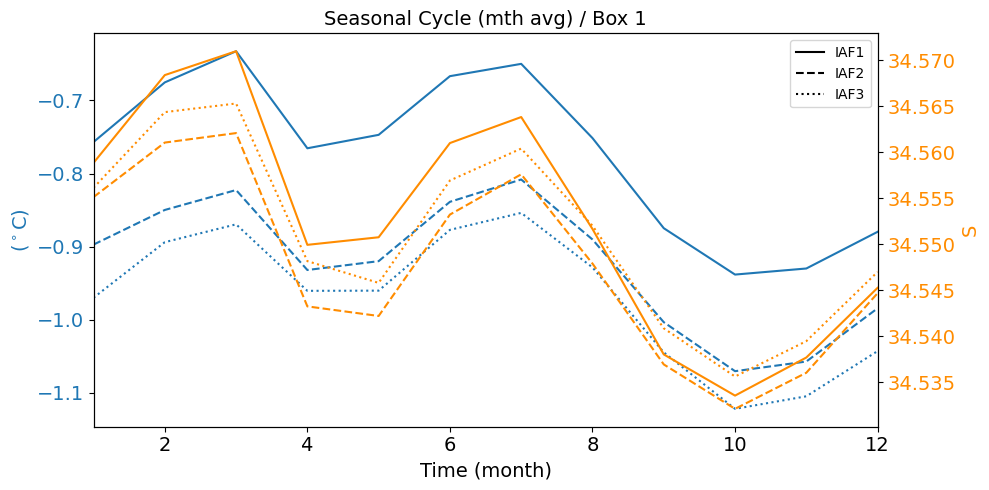

In [41]:
fontsize=14

fig, ax1 = plt.subplots(figsize = (10, 5))
temp_400m_mth.plot(color='C0',label='IAF1')
temp_400m_mth2.plot(color='C0',linestyle='--')
temp_400m_mth3.plot(color='C0',linestyle=':')
ax1.set_ylabel('($^\circ$C)', fontsize=fontsize,color='C0')
ax1.tick_params(axis='y', labelcolor='C0',labelsize=fontsize)
ax1.set_xlabel(r'Time (month)', fontsize = fontsize)
ax1.tick_params(axis='x',labelsize=fontsize)
plt.title('Seasonal Cycle (mth avg) / Box 1',fontsize=fontsize)

ax2 = ax1.twinx()
sal_400m_mth.plot(color='darkorange')
sal_400m_mth2.plot(color='darkorange',linestyle='--')
sal_400m_mth3.plot(color='darkorange',linestyle=':')
ax2.set_ylabel('S', fontsize=fontsize, color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange',labelsize=fontsize)
plt.xlim((1, 12))

#building legend
plt.plot(np.nan,np.nan,color='k',label='IAF1')
plt.plot(np.nan,np.nan,color='k',linestyle='--',label='IAF2')
plt.plot(np.nan,np.nan,color='k',linestyle=':',label='IAF3')
plt.legend()

fig.tight_layout()
figdir = '/g/data/v45/ns3783/ScriptsChapter3/Figures'
filestr = figdir+'/iaf_cicles_comparison_seasonal.png'
plt.savefig(filestr,dpi=600,bbox_inches='tight')


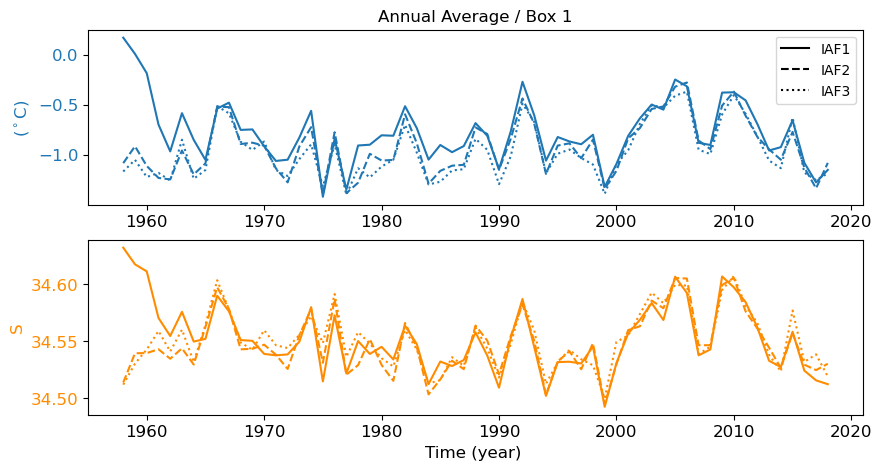

In [42]:
fontsize=12

fig, plt.figure(figsize = (10, 5))
ax1 = plt.subplot(2, 1, 1)
temp_400m_annual.plot(color='C0')
temp_400m_annual2.plot(color='C0',linestyle='--')
temp_400m_annual3.plot(color='C0',linestyle=':')
ax1.set_ylabel('($^\circ$C)', fontsize=fontsize,color='C0')
ax1.tick_params(axis='y', labelcolor='C0',labelsize=fontsize)
ax1.set_xlabel(' ', fontsize = fontsize)
ax1.tick_params(axis='x',labelsize=fontsize)
plt.title('Annual Average / Box 1',fontsize=fontsize)
#building legend
plt.plot(np.nan,np.nan,color='k',label='IAF1')
plt.plot(np.nan,np.nan,color='k',linestyle='--',label='IAF2')
plt.plot(np.nan,np.nan,color='k',linestyle=':',label='IAF3')
plt.legend()

ax2 = plt.subplot(2, 1, 2)
sal_400m_annual.plot(color='darkorange')
sal_400m_annual2.plot(color='darkorange',linestyle='--')
sal_400m_annual3.plot(color='darkorange',linestyle=':')
ax2.set_ylabel('S', fontsize=fontsize, color='darkorange')
ax2.set_xlabel(r'Time (year) ', fontsize = fontsize)
ax2.tick_params(axis='x',labelsize=fontsize)
ax2.tick_params(axis='y', labelcolor='darkorange',labelsize=fontsize)


fig.tight_layout()
figdir = '/g/data/v45/ns3783/ScriptsChapter3/Figures'
filestr = figdir+'/iaf_cicles_comparison_interannual.png'
plt.savefig(filestr,dpi=600,bbox_inches='tight')

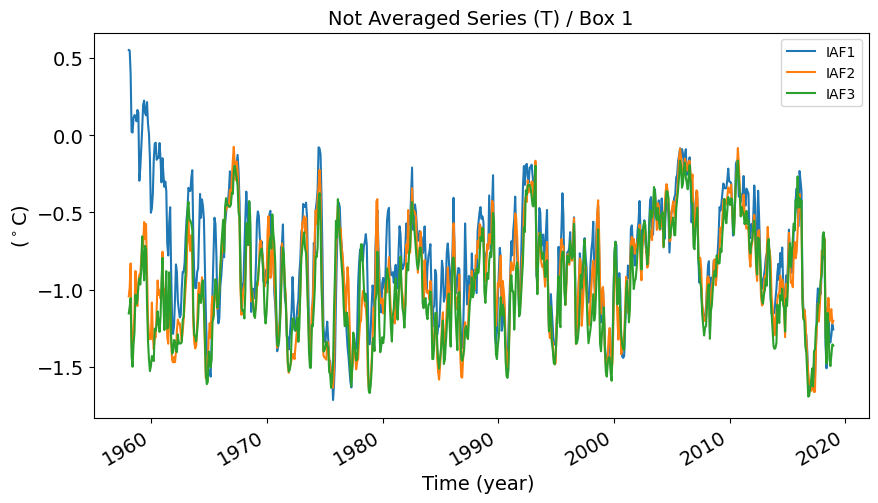

In [44]:
fontsize=14

fig, plt.figure(figsize = (10, 5))

temp_400m.plot(label='IAF1')
temp_400m2.plot(label='IAF2')
temp_400m3.plot(label='IAF3')
plt.ylabel('($^\circ$C)', fontsize=fontsize)
plt.xlabel(r'Time (year) ', fontsize = fontsize)
plt.tick_params(axis='x',labelsize=fontsize)
plt.tick_params(axis='y',labelsize=fontsize)
plt.title('Not Averaged Series (T) / Box 1',fontsize=fontsize)
plt.legend()

fig.tight_layout()
figdir = '/g/data/v45/ns3783/ScriptsChapter3/Figures'
filestr = figdir+'/iaf_cicles_comparison_mthly_T.png'
plt.savefig(filestr,dpi=600,bbox_inches='tight')


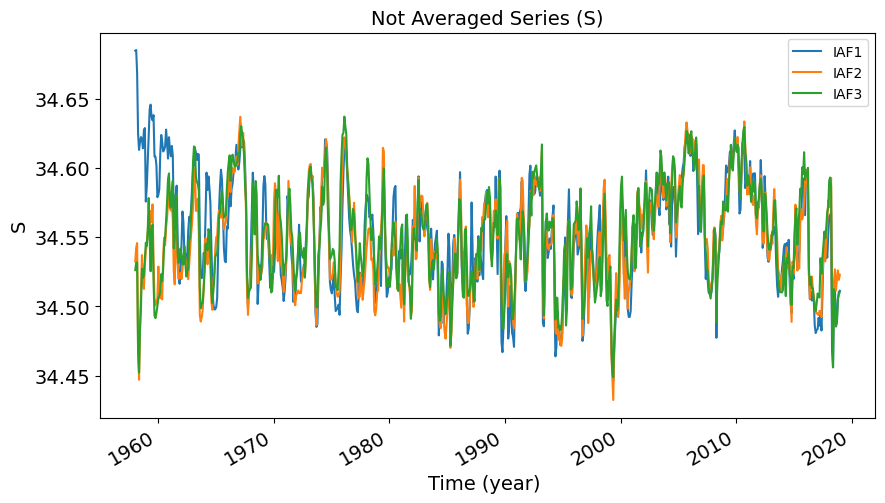

In [45]:
fontsize=14

fig, plt.figure(figsize = (10, 5))
sal_400m.plot(label='IAF1')
sal_400m2.plot(label='IAF2')
sal_400m3.plot(label='IAF3')
plt.ylabel('S', fontsize=fontsize)
plt.xlabel(r'Time (year) ', fontsize = fontsize)
plt.tick_params(axis='x',labelsize=fontsize)
plt.tick_params(axis='y',labelsize=fontsize)
plt.title('Not Averaged Series (S)',fontsize=fontsize)
plt.legend()

fig.tight_layout()
figdir = '/g/data/v45/ns3783/ScriptsChapter3/Figures'
filestr = figdir+'/iaf_cicles_comparison_mthly_S.png'
plt.savefig(filestr,dpi=600,bbox_inches='tight')
